Japan Birth Data-Analysis 1899-2023 , almost 124 years.

Extracting data file.


In [24]:
import pandas as pd
df=pd.read_csv("japan_birth_statistics_1899_2023.csv")
df.head()

,year,total_births,male_births,female_births,crude_birth_rate,sex_ratio_at_birth,total_fertility_rate
0,2023,727288,372603,354685,6.0,105.1,1.20
1,2022,770759,395257,375502,6.3,105.3,1.26
2,2021,811622,415903,395719,6.6,105.1,1.30
3,2020,840835,430713,410122,6.8,105.0,1.33
4,2019,865239,443430,421809,7.0,105.1,1.36


Information of data.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  122 non-null    int64  
 1   total_births          122 non-null    int64  
 2   male_births           122 non-null    int64  
 3   female_births         122 non-null    int64  
 4   crude_birth_rate      122 non-null    float64
 5   sex_ratio_at_birth    122 non-null    float64
 6   total_fertility_rate  77 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 6.8 KB


Counting null values.

In [26]:
print("Null valueCount below:")
df.isnull().sum()

Null valueCount below:


year                     0
total_births             0
male_births              0
female_births            0
crude_birth_rate         0
sex_ratio_at_birth       0
total_fertility_rate    45
dtype: int64

Data cleaning: 
45 rows out of 122 in total_fertility_rate are null, replacing with mean value between upper and lower value of null rows.

In [37]:
df['total_fertility_rate'] = df['total_fertility_rate'].interpolate(method='linear')
print("Data cleaned successfully")

Data cleaned successfully


In [38]:
print(df.isnull().sum())

year                    0
total_births            0
male_births             0
female_births           0
crude_birth_rate        0
sex_ratio_at_birth      0
total_fertility_rate    0
dtype: int64


Data Analysis and visualisation.

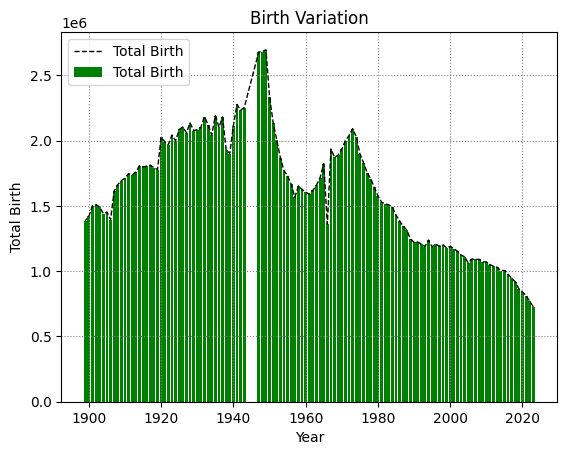

Highest birth no. was in 1949 which is: 2696638
Lowest birth no. was in 2023 which is: 727288


In [54]:
import matplotlib.pyplot as plt
plt.bar(df['year'],df['total_births'] , color="green" ,label="Total Birth")
plt.plot(df['year'],df['total_births'] , color="black" ,linestyle="--",linewidth="1",label="Total Birth")
plt.legend(loc='upper left',fontsize=10)
plt.title('Birth Variation')
plt.xlabel("Year")
plt.ylabel("Total Birth")
plt.grid(color='grey',linestyle=':')
plt.show()
print("Highest birth no. was in",df[df['total_births']==df['total_births'].max()]['year'].values[0],"which is:",df['total_births'].max())
print("Lowest birth no. was in",df[df['total_births']==df['total_births'].min()]['year'].values[0],"which is:",df['total_births'].min())


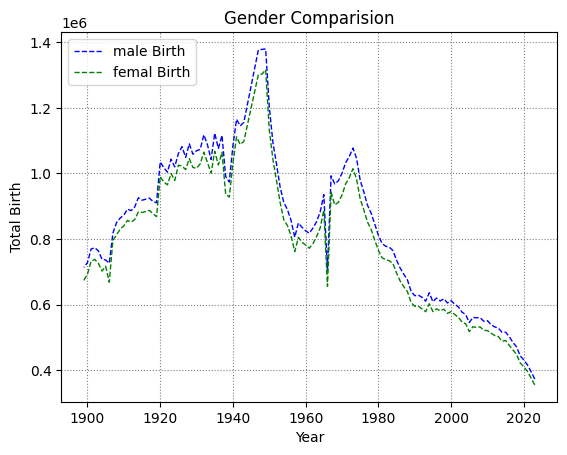

In [40]:
plt.plot(df['year'] ,df['male_births'], color="blue" ,linestyle="--",linewidth="1",label="male Birth")
plt.plot(df['year'] ,df['female_births'], color="green" ,linestyle="--",linewidth="1",label="femal Birth")
plt.legend(loc='upper left',fontsize=10)
plt.title('Gender Comparision')
plt.xlabel("Year")
plt.ylabel("Total Birth")
plt.grid(color='grey',linestyle=':')
plt.show()

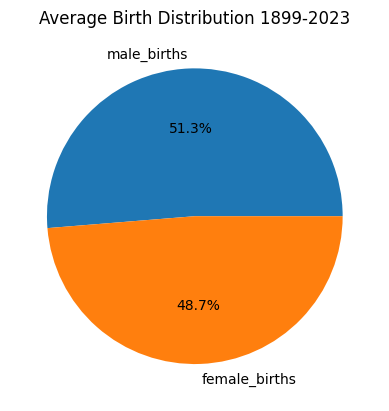

In [41]:
totals = df[['male_births','female_births']].sum()
totals.plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.ylabel('')
plt.title("Average Birth Distribution 1899-2023")
plt.show()


In [8]:
print('Year when male birth was at peak: ',df[df['male_births'] == df['male_births'].max()]['year'].values[0])
print('Year when female birth was at peak: ',df[df['female_births'] == df['female_births'].max()]['year'].values[0])

Year when male birth was at peak:  1949
Year when female birth was at peak:  1949


Fertility Rate Trend

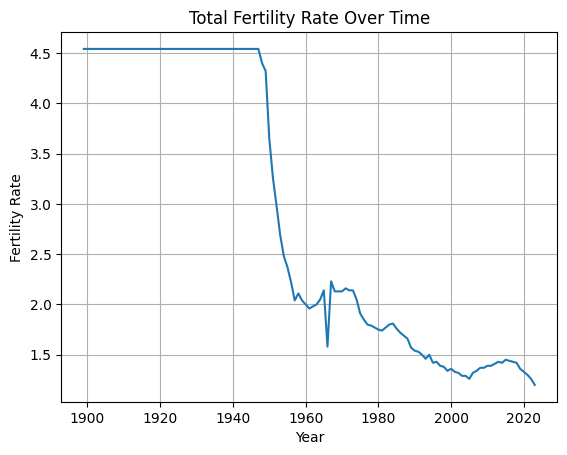

In [43]:
plt.figure()
plt.plot(df['year'], df['total_fertility_rate'])
plt.title("Total Fertility Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.grid(True)
plt.show()

Crude Birth Rate vs Fertility Rate (Comparison)

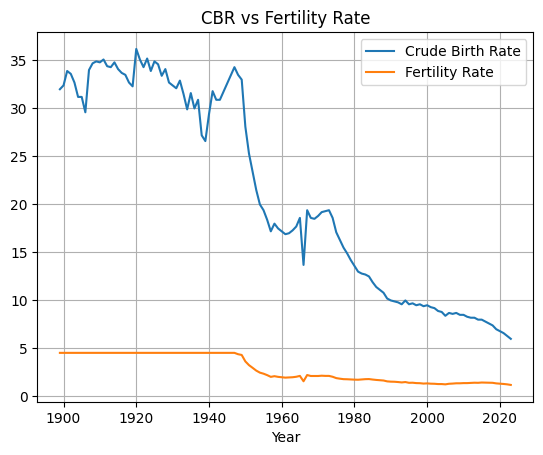

In [44]:
plt.figure()
plt.plot(df['year'], df['crude_birth_rate'], label="Crude Birth Rate")
plt.plot(df['year'], df['total_fertility_rate'], label="Fertility Rate")

plt.legend()
plt.title("CBR vs Fertility Rate")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Growth Rate Analysis

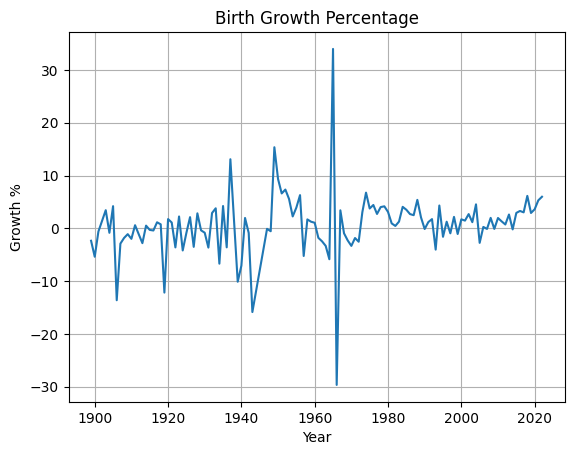

Year for Maximum birth_growth:  1965
Year for Minimum birth_growth:  1966


In [45]:
df['birth_growth_%'] = df['total_births'].pct_change() * 100

plt.figure()
plt.plot(df['year'], df['birth_growth_%'])
plt.title("Birth Growth Percentage")
plt.xlabel("Year")
plt.ylabel("Growth %")
plt.grid(True)
plt.show()
print('Year for Maximum birth_growth: ',df[df['birth_growth_%']==df['birth_growth_%'].max()]['year'].values[0])
print('Year for Minimum birth_growth: ',df[df['birth_growth_%']==df['birth_growth_%'].min()]['year'].values[0])

Correlation Heatmap

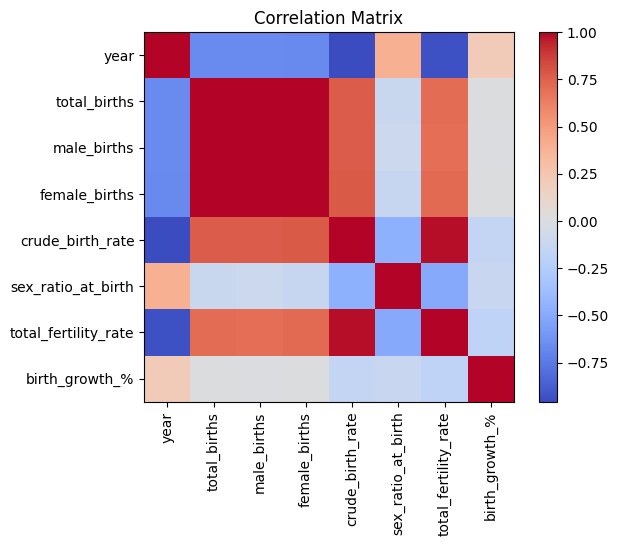

In [46]:
plt.figure()
plt.imshow(df.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Correlation Matrix")
plt.show()

Male–Female Gap Analysis

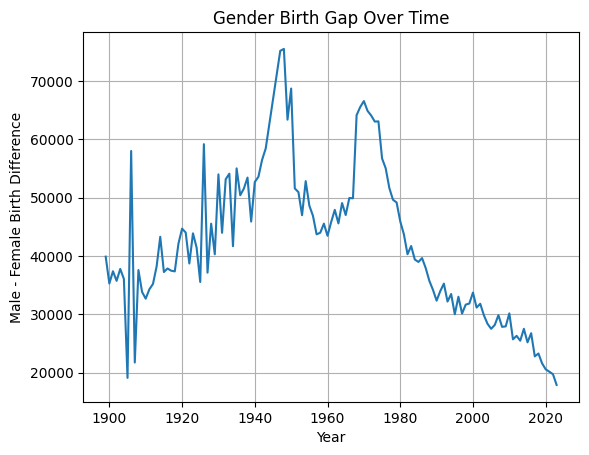

Year for highest birth_gap:  1948
Year for lowest birth_gap:  2023


In [47]:
df['gender_gap'] = df['male_births'] - df['female_births']

plt.figure()
plt.plot(df['year'], df['gender_gap'])
plt.title("Gender Birth Gap Over Time")
plt.xlabel("Year")
plt.ylabel("Male - Female Birth Difference")
plt.grid(True)
plt.show()
print('Year for highest birth_gap: ',df[df['gender_gap']==df['gender_gap'].max()]['year'].values[0])
print('Year for lowest birth_gap: ',df[df['gender_gap']==df['gender_gap'].min()]['year'].values[0])

📊 Final Analysis

(This analysis is done without any use of AI. It may seem simple, but it is precise and to the point.)

1️⃣ Fertility Rate Trend

Fertility rate has been declining consistently over the years.

The highest fertility rate period was between 1900–1940.

2️⃣ Birth Growth Analysis

Birth growth indicates the year-to-year change in population.

Year with Maximum Birth Growth: 1965

Year with Minimum Birth Growth: 1966

3️⃣ Male–Female Birth Gap

The birth gap between males and females has varied over time.

Year with Highest Birth Gap: 1948

Year with Lowest Birth Gap: 2023

4️⃣ Overall Birth Percentage (by Gender)

Male: 51.3%

Female: 48.7%

5️⃣ Total Number of Births

Highest Number of Births: 2,696,638 (in 1949)

Lowest Number of Births: 727,288 (in 2023)